In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [51]:
from google.colab import files
uploaded = files.upload()

Saving gripdata.csv to gripdata (2).csv


In [52]:
import io
df = pd.read_csv(io.BytesIO(uploaded["gripdata.csv"]))

In [53]:
df

,pressure,short_grip
0,1024.43,0
1,1024.41,0
2,1024.56,0
3,1024.59,0
4,1024.67,0
...,...,...
737,1006.71,1
738,1007.64,1
739,1008.29,1
740,1008.94,1


In [54]:
df.shape

(742, 2)

In [55]:
df.describe()

,pressure,short_grip
count,742.000000,742.000000
mean,1025.188652,0.497305
std,16.263342,0.500330
min,978.590000,0.000000
25%,1015.205000,0.000000
50%,1029.235000,0.000000
75%,1034.035000,1.000000
max,1079.040000,1.000000


In [56]:
shuffled_df = df.sample(frac=1)

In [57]:
shuffled_df.reset_index(inplace=True)

In [58]:
shuffled_df

,index,pressure,short_grip
0,346,1030.04,0
1,711,1009.01,1
2,559,1033.10,1
3,107,1032.68,0
4,586,1036.94,1
...,...,...,...
737,308,1031.89,0
738,621,1019.44,1
739,197,991.11,0
740,449,1026.34,1


In [59]:
X = shuffled_df[["pressure"]]
y = shuffled_df["short_grip"]

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

In [61]:
X_train.shape

(519, 1)

In [62]:
X_train.head()

,pressure
250,1040.13
638,1005.22
369,1048.56
539,1029.98
520,1037.28


In [63]:
y_train.shape

(519,)

In [64]:
X_test.head()

,pressure
709,1033.81
357,1028.27
268,1028.86
230,1014.64
678,1034.02


In [65]:
y_test.head()

709    1
357    0
268    0
230    1
678    1
Name: short_grip, dtype: int64

In [66]:
baseline_accuracy = max(y_train.value_counts(normalize=True))
baseline_accuracy

0.5086705202312138

In [67]:
model = make_pipeline(StandardScaler(),
                      LogisticRegression(random_state=43)
)

model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=43,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [ ]:
model.predict(X_test)

In [ ]:
model.predict_proba(X_test)

In [70]:
model.score(X_test, y_test)

0.6681614349775785

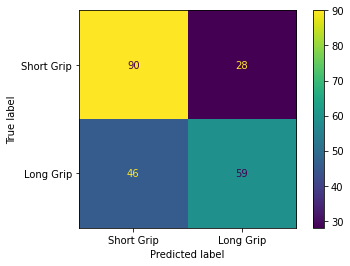

In [71]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test, display_labels=["Short Grip", "Long Grip"])

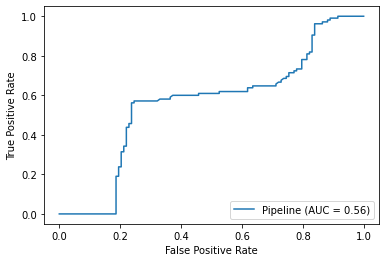

In [72]:
from sklearn.metrics import roc_curve, plot_roc_curve

lr = plot_roc_curve(model, X_test, y_test)

In [73]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

yhat_classes = model.predict(X_test)

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)

Accuracy: 0.668161
Precision: 0.678161
Recall: 0.561905
F1 score: 0.614583
